In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('nasdaq100.csv',sep=';')
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression()

In [7]:
x=df.drop(columns=['Ending (USD)','Date'])
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [8]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


In [9]:
reg.fit(x,y)

LinearRegression()

In [10]:
reg.predict([[16700]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [11]:
df['predicted_y'] = reg.predict(x)

In [12]:
df = df.drop('Date',axis=1)
df.head()

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


In [13]:
df['lose']=df['Ending (USD)'] - df['predicted_y']

In [14]:
df.head()

,Starting (USD),Ending (USD),predicted_y,lose
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [15]:
#MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [16]:
mse = mean_squared_error(df['Ending (USD)'],df['predicted_y'])
mse

80411.23397700385

In [17]:
mae = mean_absolute_error(df['Ending (USD)'],df['predicted_y'])
mae

260.3840017604666

In [18]:
abs(df['lose'])

0     130.731144
1     318.055785
2     416.685922
3     287.539198
4     342.977389
5      30.731144
6     418.055785
7     216.685922
8     154.910051
9     242.977389
10    222.280904
11    342.977389
Name: lose, dtype: float64

In [19]:
sum(abs(df['lose']))/len(x)

260.3840017604666

In [21]:
reg.score(x,y)

0.3577804940272571

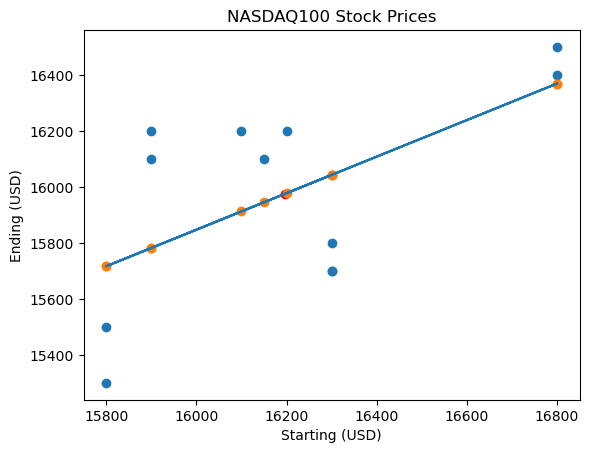

In [25]:

plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.scatter(df['Starting (USD)'], reg.predict(x))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title("NASDAQ100 Stock Prices")
plt.plot(x,reg.predict(x))
